In [2]:
# LET'S IMPORT LIBRARIES.(KÜTÜPHANLERİ İMPORT EDELİM.)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msg

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import recall_score , f1_score , precision_score , roc_auc_score , roc_curve
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [3]:
# LET'S ASSIGN IT TO THE 'df' VARIABLE IN ORDER TO USE OUR DATA FRAMEWORK.(VERİ ÇERÇEVEMİZİ KULLANABİLMEK İÇİN 'df' DEĞİŞKENİNE ATAYALIM.)

df = pd.read_csv("tablet.csv")

In [4]:
# PHASE 1 ---> EXPLORATORY DATA ANALYSIS(1.SAFHA ---> KEŞİFÇİ VERİ ANALİZİ)

In [5]:
# LET'S SEE HOW MANY ATTRIBUTES AND HOW MANY OBSERVATIONS THE DATA FRAMEWORK CONSISTS OF.(VERİ ÇERÇEVESİNİN KAÇ ÖZNİTELİK VE KAÇ GÖZLEMDEN OLUŞTUĞUNU GÖRELİM.)

df.shape

(2000, 20)

In [6]:
# LET'S DISPLAY THE TOP 10 OBSERVATIONS OF THE DATA FRAMEWORK.(VERİ ÇERÇEVESİNİN İLK 10 GÖZLEMİNİ GÖRÜNTÜLEYELİM.)

df.head(10)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
5,1162,Yok,1.0,Yok,0.0,Yok,50,0.5,104,4,10,332,866,1404.0,15,Var,Var,Var,Ucuz,Beyaz
6,1849,Var,0.5,Yok,1.0,Yok,29,0.5,181,7,12,978,1986,3330.0,15,Var,Yok,Var,Pahalı,Gri
7,1860,Yok,0.5,Var,2.0,Var,55,0.7,83,6,3,195,799,676.0,4,Var,Yok,Var,Çok Ucuz,Beyaz
8,1536,Yok,0.8,Yok,12.0,Yok,13,0.3,105,7,20,22,1634,2020.0,16,Var,Var,Yok,Normal,Sarı
9,539,Var,0.6,Var,9.0,Yok,21,0.1,145,7,14,551,599,3597.0,9,Yok,Yok,Yok,Normal,Mavi


In [7]:
# LET'S VIEW THE LAST 5 OBSERVATIONS OF THE DATA FRAMEWORK.(VERİ ÇERÇEVESİNİN SON 5 GÖZLEMİNİ GÖRÜNTÜLEYELİM.)

df.tail()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz
1999,1872,Yok,0.5,Yok,5.0,Var,26,0.5,172,4,10,672,1088,2273.0,8,Var,Yok,Var,Normal,Siyah


In [8]:
# LET'S DISPLAY THE INFORMATION OF OUR DATA SET.(VERİ SETİMİZİN BİLGİLERİNİ GÖRÜNTÜLEYELİM.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [9]:
# LET'S DISPLAY THE BASIC STATISTICAL VALUES OF THE DATA FRAMEWORK BY TRANSPOSING THEM.(VERİ ÇERÇEVESİNİN TEMEL İSTATİSTİK DEĞERLERİNİ TRANSPOZUNU ALARAK GÖRÜNTÜLEYELİM.)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [10]:
# LET'S DISPLAY THE DATA TYPES OF THE ATTRIBUTES OF OUR DATA FRAMEWORK(VERİ ÇERÇEVEMİZİN ÖZNİTELİKLERİNİN DATA TİPLERİNİ GÖRÜNTÜLEYELİM)

df.dtypes

BataryaGucu              int64
Bluetooth               object
MikroislemciHizi       float64
CiftHat                 object
OnKameraMP             float64
4G                      object
DahiliBellek             int64
Kalinlik               float64
Agirlik                  int64
CekirdekSayisi           int64
ArkaKameraMP             int64
CozunurlukYükseklik      int64
CozunurlukGenislik       int64
RAM                    float64
BataryaOmru              int64
3G                      object
Dokunmatik              object
WiFi                    object
FiyatAraligi            object
Renk                    object
dtype: object

In [11]:
# LET'S CHECK THE MISSING VALUES IN OUR DATA FRAMEWORK.(VERİ ÇERÇEVEMİZDEKİ EKSİK DEĞERLERİ KONTROL EDELİM.)

df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [12]:
# LET'S FIND HOW MANY MISSING VALUES WE HAVE IN THE DATA FRAMEWORK.(VERİ ÇERÇEVESİNDE TOPLAM KAÇ ADET EKSİK DEĞERİMİZ OLDUĞUNU BUULALIM.)

df.isnull().sum().sum()

17

In [13]:
# LET'S DISPLAY THE MANY BLUETOOTH ATTRIBUTE VALUES IN OUR DATA FRAMEWORK.(VERİ ÇERÇEMİZDEKİ BLUETOOTH ÖZNİTELİK DEĞERİNİN KAÇAR ADET OLDUĞUNU GÖRÜNTÜLEYELİM.)

df["Bluetooth"].value_counts()

Bluetooth
Yok    1010
Var     990
Name: count, dtype: int64

In [14]:
# LET'S VIEW THE MANY 4G ATTRIBUTES VALUES IN OUR DATA FRAMEWORK.(VERİ ÇERÇEMİZDEKİ 4G ÖZNİTELİK DEĞERİNİN KAÇAR ADET OLDUĞUNU GÖRÜNTÜLEYELİM.)

df["4G"].value_counts()

4G
Var    1043
Yok     957
Name: count, dtype: int64

In [15]:
# LET'S DISPLAY THE MANY CiftHat ATTRIBUTE VALUES IN OUR DATA FRAMEWORK.(VERİ ÇERÇEMİZDEKİ CiftHat ÖZNİTELİK DEĞERİNİN KAÇAR ADET OLDUĞUNU GÖRÜNTÜLEYELİM.)

df["CiftHat"].value_counts()

CiftHat
Var    1019
Yok     981
Name: count, dtype: int64

In [16]:
# LET'S VIEW THE MANY 3G ATTRIBUTES VALUES IN OUR DATA FRAMEWORK.(VERİ ÇERÇEMİZDEKİ 3G ÖZNİTELİK DEĞERİNİN KAÇAR ADET OLDUĞUNU GÖRÜNTÜLEYELİM.)

df["3G"].value_counts()

3G
Var    1523
Yok     477
Name: count, dtype: int64

In [17]:
# LET'S VIEW THE MANY RearCameraMP ATTRIBUTE VALUES IN OUR DATA FRAME.(VERİ ÇERÇEMİZDEKİ ArkaKameraMP ÖZNİTELİK DEĞERİNİN KAÇAR ADET OLDUĞUNU GÖRÜNTÜLEYELİM.)

df["ArkaKameraMP"].value_counts()

ArkaKameraMP
10    122
7     119
9     112
20    110
14    104
1     104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: count, dtype: int64

In [18]:
# LET'S DISPLAY THE MANY COLOR ATTRIBUTE VALUES IN OUR DATA FRAMEWORK.(VERİ ÇERÇEMİZDEKİ Renk ÖZNİTELİK DEĞERİNİN KAÇAR ADET OLDUĞUNU GÖRÜNTÜLEYELİM.)

df["Renk"].value_counts()

Renk
Beyaz         194
Siyah         183
Mor           175
Turuncu       175
Pembe         168
Kırmızı       168
Turkuaz       167
Kahverengi    157
Sarı          156
Yeşil         154
Gri           153
Mavi          150
Name: count, dtype: int64

In [19]:
# LET'S LOOK AT THE COLUMNS OF OUR DATA FRAMEWORK.(VERİ ÇERÇEVEMİZİN SÜTUNLARINA BAKALIM.)

df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')

In [20]:
# LET'S DISPLAY THE DATA TYPES OF THE ATTRIBUTES OF OUR DATA FRAMEWORK(VERİ ÇERÇEVEMİZİN ÖZNİTELİKLERİNİN DATA TİPLERİNİ GÖRÜNTÜLEYELİM)

df.dtypes

BataryaGucu              int64
Bluetooth               object
MikroislemciHizi       float64
CiftHat                 object
OnKameraMP             float64
4G                      object
DahiliBellek             int64
Kalinlik               float64
Agirlik                  int64
CekirdekSayisi           int64
ArkaKameraMP             int64
CozunurlukYükseklik      int64
CozunurlukGenislik       int64
RAM                    float64
BataryaOmru              int64
3G                      object
Dokunmatik              object
WiFi                    object
FiyatAraligi            object
Renk                    object
dtype: object

In [21]:
# LET'S CONVERT THE CATEGORICAL COLUMNS IN OUR DATA FRAMEWORK INTO NUMERICAL COLUMNS.(VERİ ÇERÇEVEMİZDEKİ KATEGORİK SÜTUNLARI SAYISAL SÜTÜUNLARA DÖNÜŞTÜRELİM.)

#df_numeric_column = ["BataryaGucu","MikroislemciHizi","OnKameraMP","DahiliBellek","Kalinlik","Agirlik","CekirdekSayisi","ArkaKameraMP","CozunurlukYükseklik","CozunurlukGenislik","RAM","BataryaOmru"]
#df_string_column = ["Bluetooth","CiftHat","4G","3G","Dokunmatik","WiFi","FiyatAraligi","Renk"]

#for i in df_string_column:
#    df[i] = pd.to_numeric(df[i], errors='coerce')


In [22]:
# LET'S TAKE THE ARITHMETIC AVERAGE FOR THE NUMERICAL ATTRIBUTES IN THE DATA FRAMEWORK.(VERİ ÇERÇEVESİNDEKİ SAYISAL ÖZNİTELİKLER İÇİN ARİTMETİK ORTALAMASINI ALALIM.)

df.select_dtypes(include=['int', 'float']).mean()

BataryaGucu            1238.518500
MikroislemciHizi          1.522250
OnKameraMP                4.312281
DahiliBellek             32.046500
Kalinlik                  0.501750
Agirlik                 140.249000
CekirdekSayisi            4.520500
ArkaKameraMP              9.916500
CozunurlukYükseklik     645.108000
CozunurlukGenislik     1251.515500
RAM                    2116.243964
BataryaOmru              11.011000
dtype: float64

In [23]:
# LET'S CALCULATE THE STANDARD DEVIATION VALUE FOR THE NUMERICAL ATTRIBUTES IN THE DATA FRAMEWORK.(VERİ ÇERÇEVESİNDEKİ SAYISAL ÖZNİTELİKLER İÇİN STANDART SAPMA DEĞERİNİ HESAPLAYALIM.)

df.select_dtypes(include=['int', 'float']).std()

BataryaGucu             439.418206
MikroislemciHizi          0.816004
OnKameraMP                4.342095
DahiliBellek             18.145715
Kalinlik                  0.288416
Agirlik                  35.399655
CekirdekSayisi            2.287837
ArkaKameraMP              6.064315
CozunurlukYükseklik     443.780811
CozunurlukGenislik      432.199447
RAM                    1082.513059
BataryaOmru               5.463955
dtype: float64

In [24]:
# LET'S CALCULATE THE MEDIA VALUE FOR THE NUMERIC ATTRIBUTES IN THE DATA FRAMEWORK.(VERİ ÇERÇEVESİNDEKİ SAYISAL ÖZNİTELİKLER İÇİN MEDYAN DEĞERİNİ HESAPLAYALIM.)

df.select_dtypes(include=["int" , "float"]).median()

BataryaGucu            1226.0
MikroislemciHizi          1.5
OnKameraMP                3.0
DahiliBellek             32.0
Kalinlik                  0.5
Agirlik                 141.0
CekirdekSayisi            4.0
ArkaKameraMP             10.0
CozunurlukYükseklik     564.0
CozunurlukGenislik     1247.0
RAM                    2129.5
BataryaOmru              11.0
dtype: float64

In [25]:
# LET'S FIND THE BINARY CORRELATIONS OF ALL COLUMNS OF THE DATA FRAMEWORK.(VERİ ÇERÇEVESİNİN TÜM SÜTUNLARININ İKİLİ KORELASYONLARINI BULALIM.)

df.select_dtypes(include=["int" ,"float"]).corr()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


<Axes: >

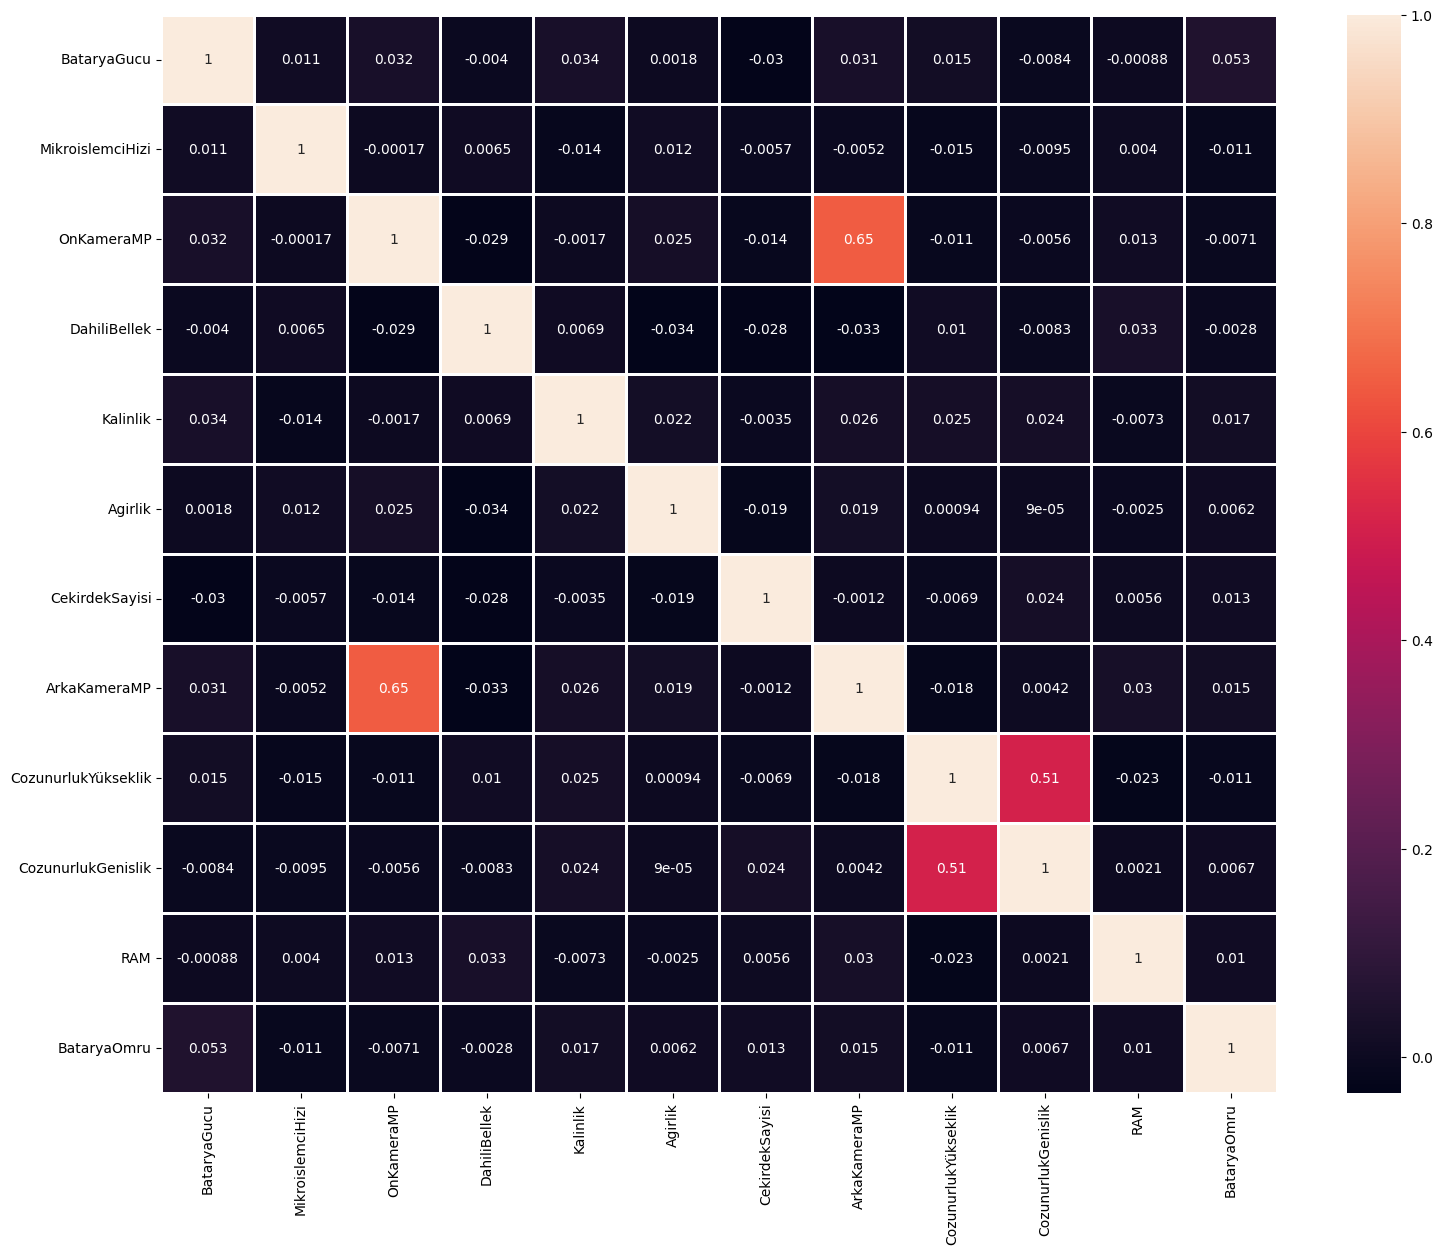

In [26]:
# LET'S VIEW THE CORRELATION CLEARLY THROUGH THE HEAT MAP.(KORELASYONU ISI HARİTASINDAN DAHA NET GÖRÜNTÜLEYELİM.)

corr = df.select_dtypes(include=["int" ,"float"]).corr()
fig , ax = plt.subplots(figsize = (18,14))
sns.heatmap(corr , annot =True , ax = ax , linewidths = 1 , xticklabels = True , yticklabels = True)

In [27]:
# LET'S FIND OUT HOW MANY UNIQUE VALUES ARE THERE FOR THE RearCameraMP ATTRIBUTE.(ArkaKameraMP ÖZNİTELİĞİ İÇİN KAÇ ADET EŞSİZ DEĞER OLDUĞUNU BULALIM.)

df["ArkaKameraMP"].nunique()

21

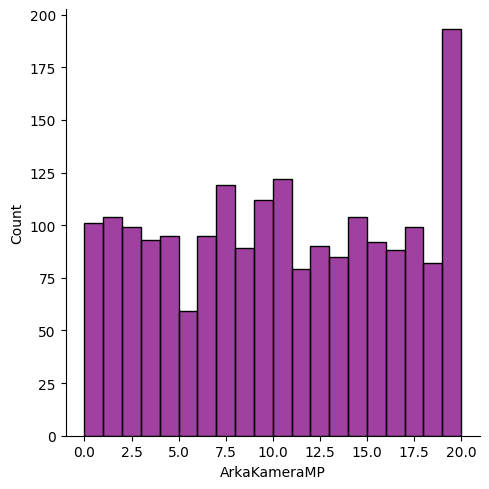

In [28]:
# LET'S DISPLAY THE DISTRIBUTION OF THE NUMBER OF TABLETS ACCORDING TO THE VALUE OF THE RearCameraMP ATTRIBUTE WITH A DISPLOT CHART.(ArkaKameraMP ÖZNİTELİĞİNİN DEĞERİNE GÖRE TABLET SAYISININ DAĞILIMINI DİSPLOT GRAFİĞİ İLE GÖRÜNTÜLÜYELİM.)

sns.displot(df["ArkaKameraMP"] , bins = 20 , color = "purple")

In [29]:
# LET'S FIND OUT HOW MANY UNIQUE VALUES THERE ARE FOR THE ONKAMERAMP ATTRIBUTE.(OnKameraMP ÖZNİTELİĞİ İÇİN KAÇ ADET EŞSİZ DEĞER OLDUĞUNU BULALIM.)

df["OnKameraMP"].nunique()

20

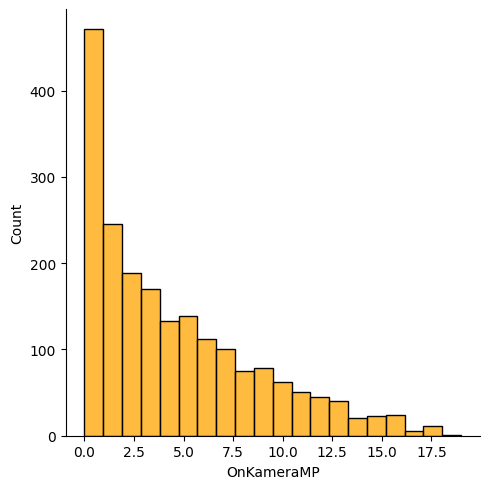

In [30]:
# LET'S DISPLAY THE DISTRIBUTION OF THE NUMBER OF TABLETS ACCORDING TO THE VALUE OF THE ONKAMERAMP ATTRIBUTE WITH A DISPLOT CHART.(OnKameraMP ÖZNİTELİĞİNİN DEĞERİNE GÖRE TABLET SAYISININ DAĞILIMINI DİSPLOT GRAFİĞİ İLE GÖRÜNTÜLÜYELİM.)

sns.displot(df["OnKameraMP"] , bins = 20 , color = "orange")

In [31]:
# LET'S FIND OUT HOW MANY UNIQUE VALUES THERE ARE FOR THE Width Attribute.(CozunurlukGenislik ÖZNİTELİĞİ İÇİN KAÇ ADET EŞSİZ DEĞER OLDUĞUNU BULALIM.)


df["CozunurlukGenislik"].nunique()

1109

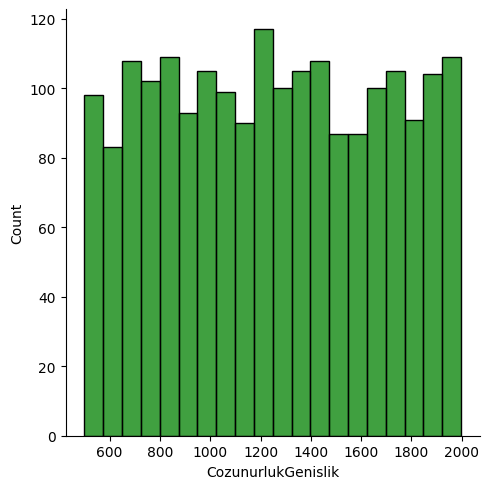

In [32]:
# LET'S DISPLAY THE DISTRIBUTION OF THE NUMBER OF TABLETS ACCORDING TO THE VALUE OF THE RESOLUTION WIDTH ATTRIBUTE WITH A DISTPLOT CHART.(CozunurlukGenislik ÖZNİTELİĞİNİN DEĞERİNE GÖRE TABLET SAYISININ DAĞILIMINI DİSPLOT GRAFİĞİ İLE GÖRÜNTÜLÜYELİM.)

sns.displot(df["CozunurlukGenislik"] , bins = 20 , color = "green")

In [33]:
# LET'S FIND OUT HOW MANY UNIQUE VALUES THERE ARE FOR THE PRICERANGE ATTRIBUTE.(FiyatAraligi ÖZNİTELİĞİ İÇİN KAÇ ADET EŞSİZ DEĞER OLDUĞUNU BULALIM.)

df["FiyatAraligi"].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [34]:
# LET'S FIND OUT HOW MANY UNIQUE VALUES THERE ARE FOR THE PRICERANGE ATTRIBUTE.(FiyatAraligi ÖZNİTELİĞİ İÇİN KAÇ ADET EŞSİZ DEĞER OLDUĞUNU BULALIM.)

df["FiyatAraligi"].nunique()

4

<Axes: xlabel='FiyatAraligi', ylabel='count'>

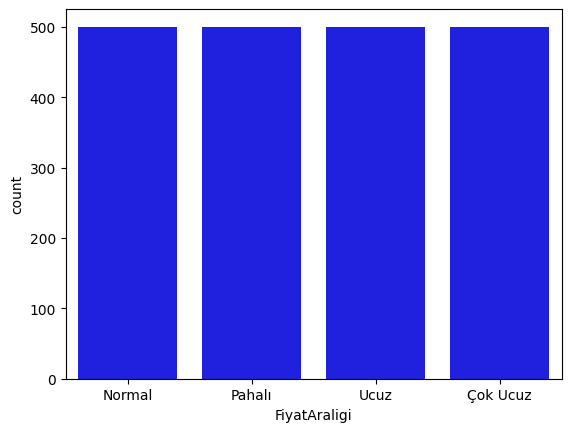

In [35]:
# LET'S DISPLAY THE DISTRIBUTION OF TABLET QUANTITIES ACCORDING TO PRICE RANGE WITH THE HELP OF COUNTPLOT CHART.(FiyatAraligi GÖRE TABLET MİKTARLARININ DAĞILIMINI COUNTPLOTGRAFİĞİ YARDIMI İLEGÖRÜNTÜLEYELİM.)

sns.countplot(x = "FiyatAraligi" , data = df , color = "blue")

<Figure size 1500x500 with 0 Axes>

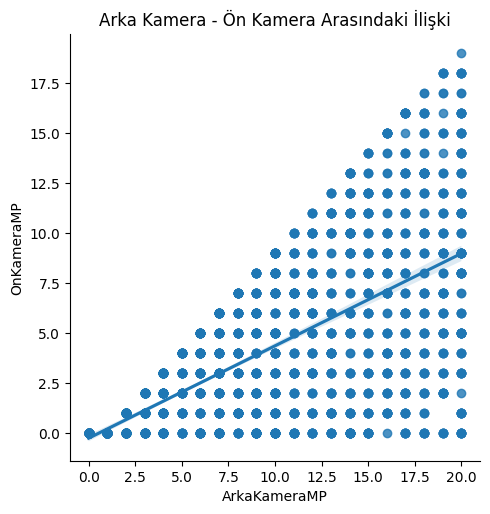

In [36]:
# LET'S DISPLAY THE RELATIONSHIP BETWEEN ArkaKameraMP AND OnKameraMP WITH AN IMPLOT GRAPH.(ArkaKameraMP VE OnKameraMP ARASINDAKİ İLİŞKİYİ İMPLOT GRAFİĞİYLE GÖRÜNTÜLEYELİM.)

plt.figure(figsize=(15, 5))
sns.lmplot(x="ArkaKameraMP", y="OnKameraMP", data=df)
plt.title("Arka Kamera - Ön Kamera Arasındaki İlişki")
plt.show()

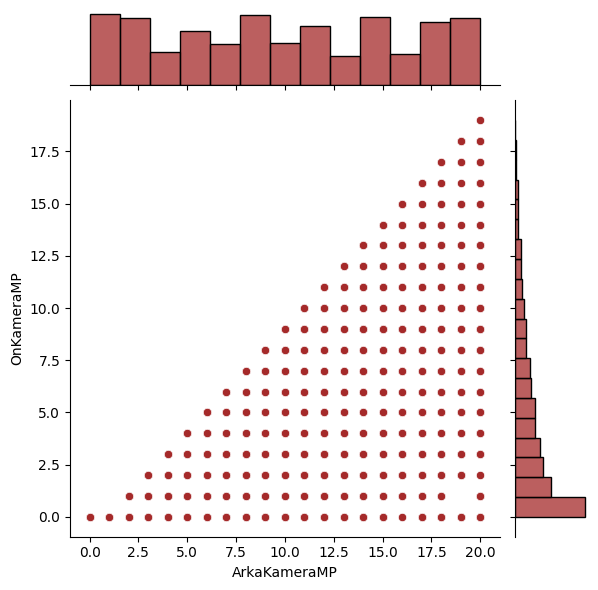

In [37]:
# LET'S DETAIL THE RELATIONSHIP BETWEEN ArkaKameraMP AND OnKameraMP WITH A JOINTPLOT GRAPH.(ArkaKameraMP VE OnKameraMP ARASINDAKİ İLİŞKİYİ JOİNTPLOT GRAFİĞİYLE DETAYLANDIRALIM.)

sns.jointplot(x = "ArkaKameraMP" , y = "OnKameraMP" , data = df , color = "brown")

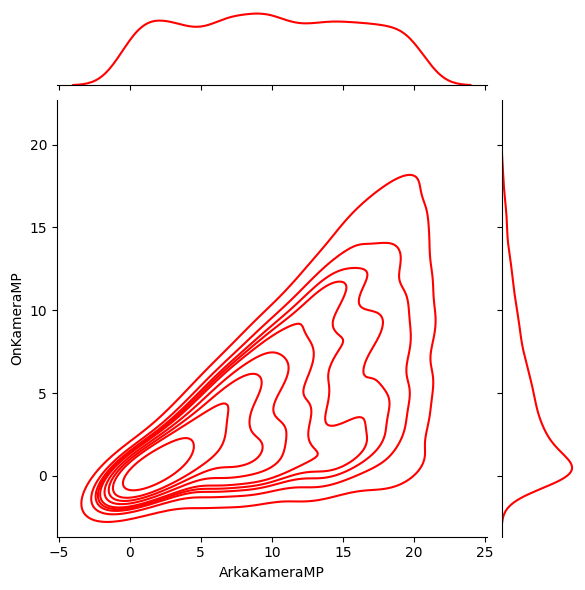

In [38]:
# LET'S SEE THE DENSITY MAP BY GIVING THE KIND = "KDE" PARAMETER IN THE JOINTPLOT GRAPH.(JOİNTPLOT GRAFİĞİNDE KİND = "KDE" PARAMETRESİNİ VEREREK YOĞUNLUK HARİTASINI GÖRELİM.)

sns.jointplot(y = df["OnKameraMP"] , x = df["ArkaKameraMP"] , kind = "kde" , color = "red")

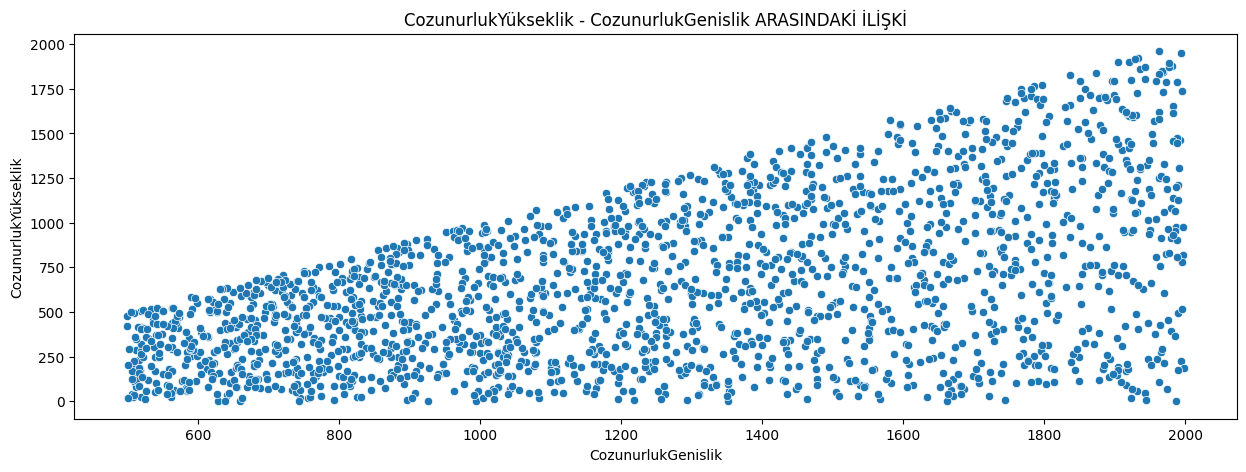

In [39]:
# LET'S DISPLAY THE RELATIONSHIP BETWEEN ResolutionHeight AND ResolutionWidth WITH A SCATTERPLOT GRAPH.(CozunurlukYükseklik VE CozunurlukGenislik ARASINDAKİ İLİŞKİYİ SCATTERPLOT GRAFİĞİYLE GÖRÜNTÜLEYELİM.)

plt.figure(figsize = (15 , 5))
sns.scatterplot(x = "CozunurlukGenislik" , y = "CozunurlukYükseklik" , data = df)
plt.title("CozunurlukYükseklik - CozunurlukGenislik ARASINDAKİ İLİŞKİ")
plt.show()

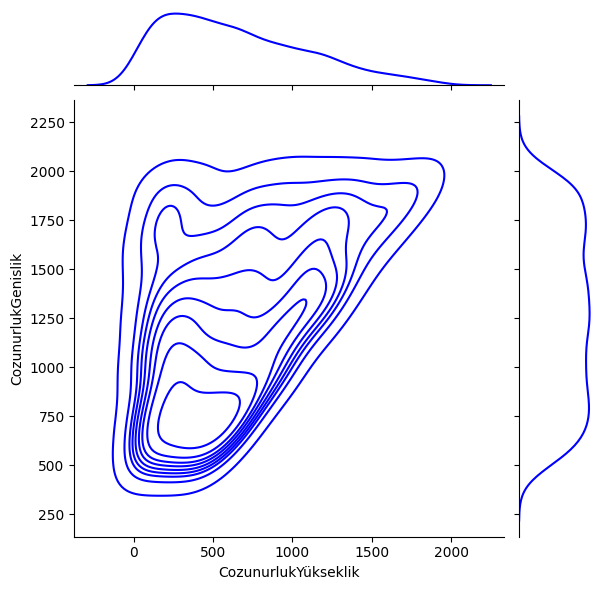

In [40]:
# OUR RESOLUTION HEIGHT VALUE IS CONCENTRATED BETWEEN 0-500 VALUES. OUR ResolutionWidth VALUE IS BETWEEN 0-200
# AVAILABLE. LET'S SEE THE DISTRIBUTIONS OF THESE INTENSITIES IN DETAIL IN THE JOINTPLOT GRAPH.
# (CozunurlukYükseklik DEĞERİMİZ 0-500 DEĞERLERİ ARASINDA YOĞUNLAŞMIŞTIR. CozunurlukGenislik DEĞERİMİZ İSE 0-200 ARASINDA
# BULUNMAKTADIR. BU YOĞUNLUKLARIN DAĞILIMLARINI JOİNTPLOT GRAFİĞİNDE DETAYLICA GÖRELİM.)

sns.jointplot(x = df["CozunurlukYükseklik"] , y = df["CozunurlukGenislik"] , kind = "kde" , color = "blue")

<Axes: xlabel='FiyatAraligi', ylabel='RAM'>

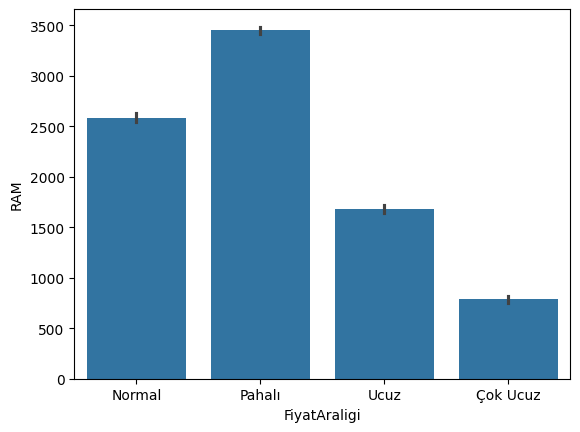

In [41]:
# LET'S DISPLAY THE RELATIONSHIP BETWEEN THE PRICE RANGE AND RAM ATTRIBUTES WITH THE HELP OF BARPLOT.(FiyatAraligi VE RAM ÖZNİTLEKLİREİNİN ARASINDAKİ İLİŞKİYİ BARPLOT YARDIMIYLA GÖRÜNTÜLEYELİM.)

sns.barplot(x = "FiyatAraligi" , y = "RAM" , data = df)

<Axes: xlabel='FiyatAraligi', ylabel='DahiliBellek'>

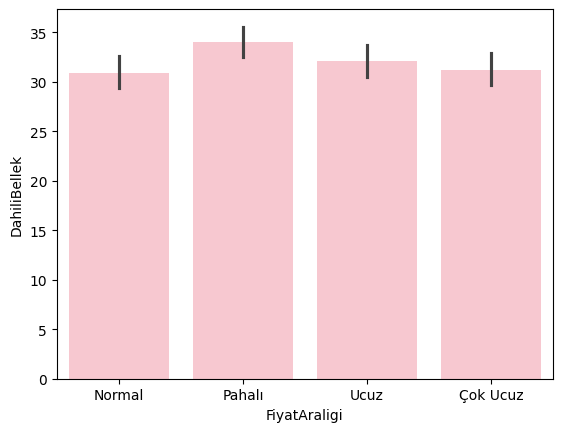

In [42]:
# LET'S DISPLAY THE RELATIONSHIP BETWEEN THE PRICE RANGE AND INTERNAL MEMORY ATTRIBUTES WITH THE HELP OF BARPLOT.(FiyatAraligi VE DahiliBellek ÖZNİTELİKLERİNİN ARASINDAKİ İLİŞKİYİ BARPLOT YARDIMIYLA GÖRÜNTÜLEYELİM.)

sns.barplot(x = "FiyatAraligi" , y = "DahiliBellek" , data = df , color = "pink")

<Axes: ylabel='MikroislemciHizi'>

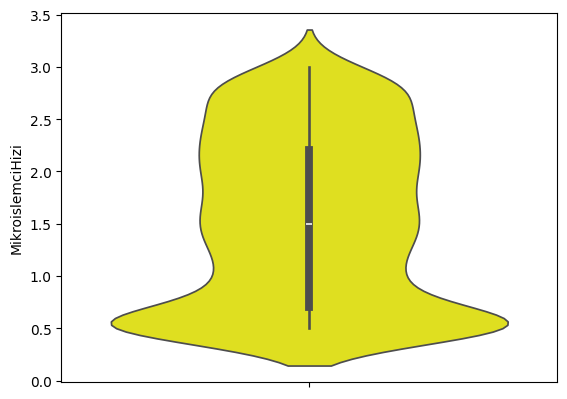

In [43]:
# LET'S DISPLAY THE DISTRIBUTION OF MicroprocessorSpeed VALUE WITH A VIOLIN GRAPH.(MikroislemciHizi DEĞERİNİN DAĞILIMINI KEMAN GRAFİĞİ İLE GÖRÜNTÜLEYELİM.)

sns.violinplot(y = "MikroislemciHizi" , data = df , color = "yellow")

<Axes: ylabel='DahiliBellek'>

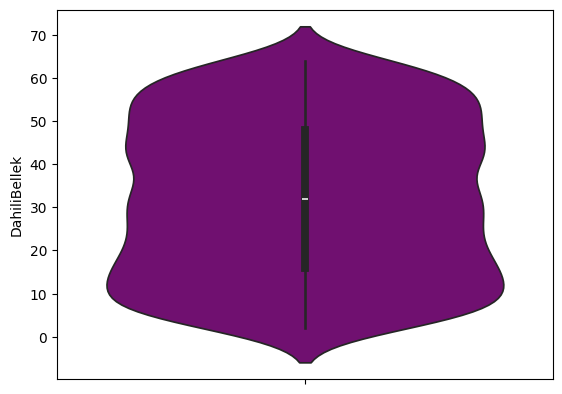

In [44]:
# LET'S DISPLAY THE DISTRIBUTION OF THE INTERNAL MEMORY VALUE WITH A VIOLIN GRAPH.(DahiliBellek DEĞERİNİN DAĞILIMINI KEMAN GRAFİĞİ İLE GÖRÜNTÜLEYELİM.)

sns.violinplot(y = "DahiliBellek" , data = df , color = "purple")

<Axes: xlabel='FiyatAraligi', ylabel='RAM'>

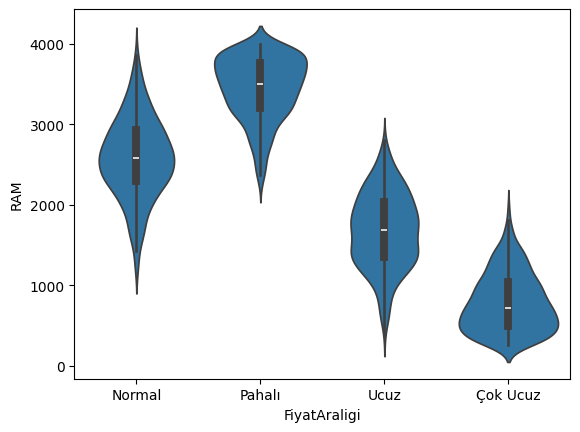

In [45]:
 # LET'S SHOW THE DENSITY OF RAM VALUES ACCORDING TO THE PRICE RANGE ATTRIBUTE WITH A VIOLINPLOT GRAPH.(FiyatAraligi ÖZNİTELİĞİNE GÖRE RAM DEĞERLERİNİN YOĞUNLUĞUNU VİOLİNPLOT GRAFİĞİ İLE GÖSTERELİM.)

sns.violinplot(x = df["FiyatAraligi"] , y = df["RAM"])

<Axes: xlabel='CiftHat', ylabel='OnKameraMP'>

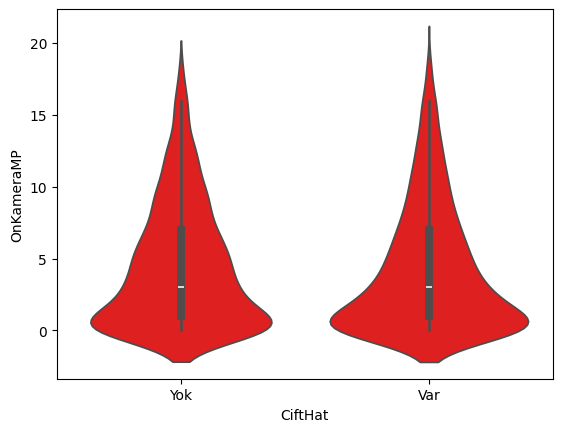

In [46]:
# LET'S SEE THAT THERE IS NO RELATIONSHIP BETWEEN CiftHat AND OnKameraMP ATTRIBUTES.(CiftHat ile OnKameraMP ÖZNİTELİKLERİ ARASINDA BİR İLİŞKİ OLMADIĞINI GÖRELİM.)

sns.violinplot(x = "CiftHat" , y = "OnKameraMP" , data = df , color ="red")

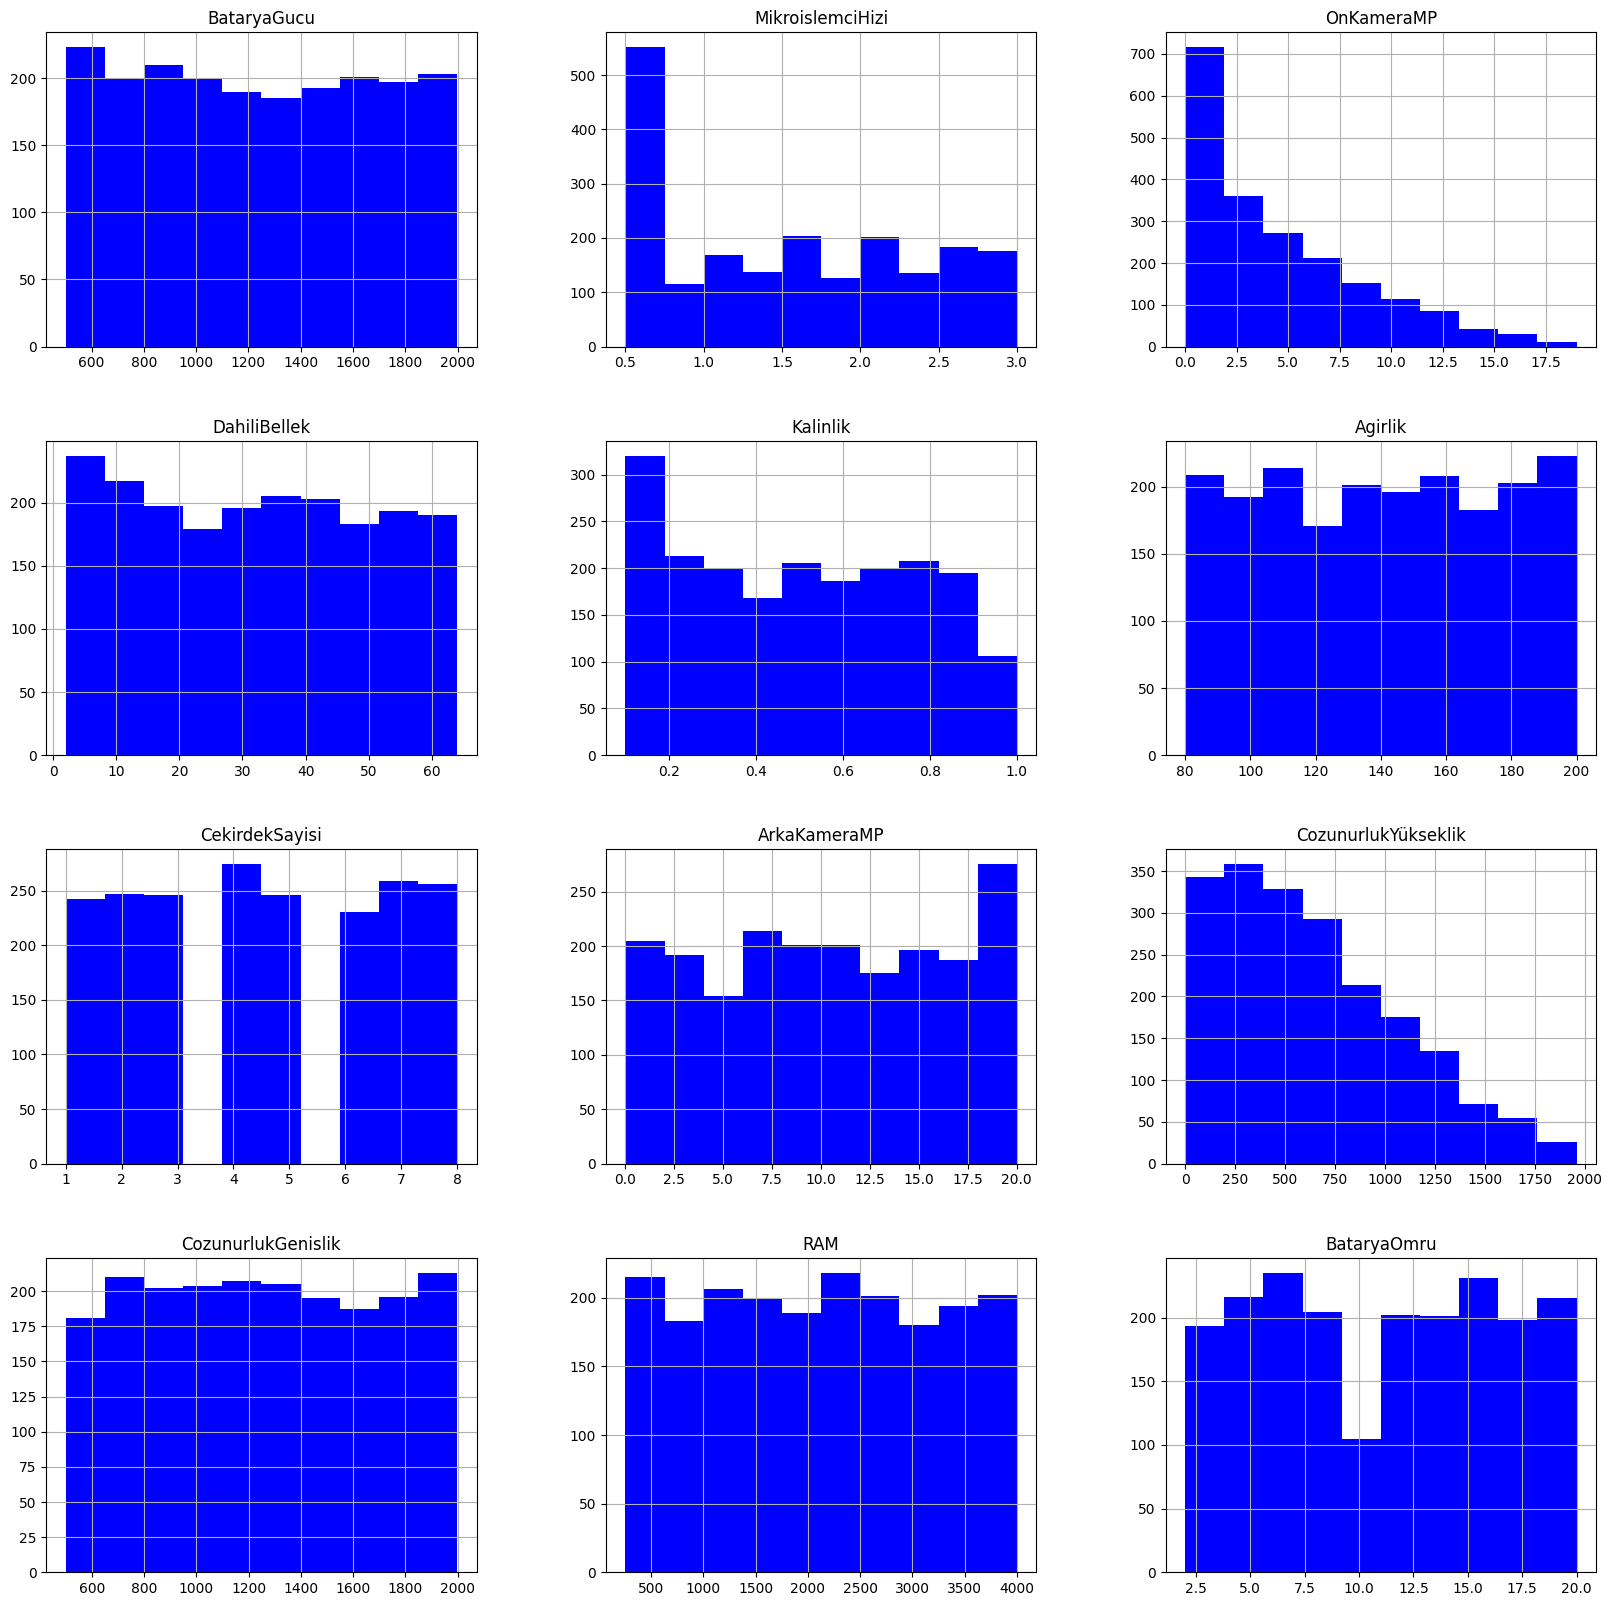

In [47]:
# LET'S SEE THE DISTRIBUTION OF THE ATTRIBUTES IN OUR DATA FRAMEWORK ACCORDING TO THEIR OWN VALUES.(VERİ ÇERÇEVEMİZDEKİ ÖZNİTELİKLERİN KENDİ DEĞERELERİNE GÖRE DAĞILIMLARINI GÖRELİM.)

df.hist(figsize = (20,20) , color = "blue")
plt.show()

In [48]:
# PHASE 2 ---> DATA PRE-PROCESSING(2. SAFHA --->  VERİ ÖN İŞLEME)

In [49]:
# LET'S VIEW THE ATTRIBUTES IN OUR DATA FRAMEWORK.(VERİ ÇERÇEVEMİZDEKİ ÖZNİTELİKLERİ GÖRÜNTÜLEYELİM.)

df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')

In [50]:
# LET'S CHECK THE MISSING VALUES IN OUR DATA FRAMEWORK.(VERİ ÇERÇEVEMİZDEKİ EKSİK DEĞERLERİ KONTROL EDELİM.)

df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

<Axes: >

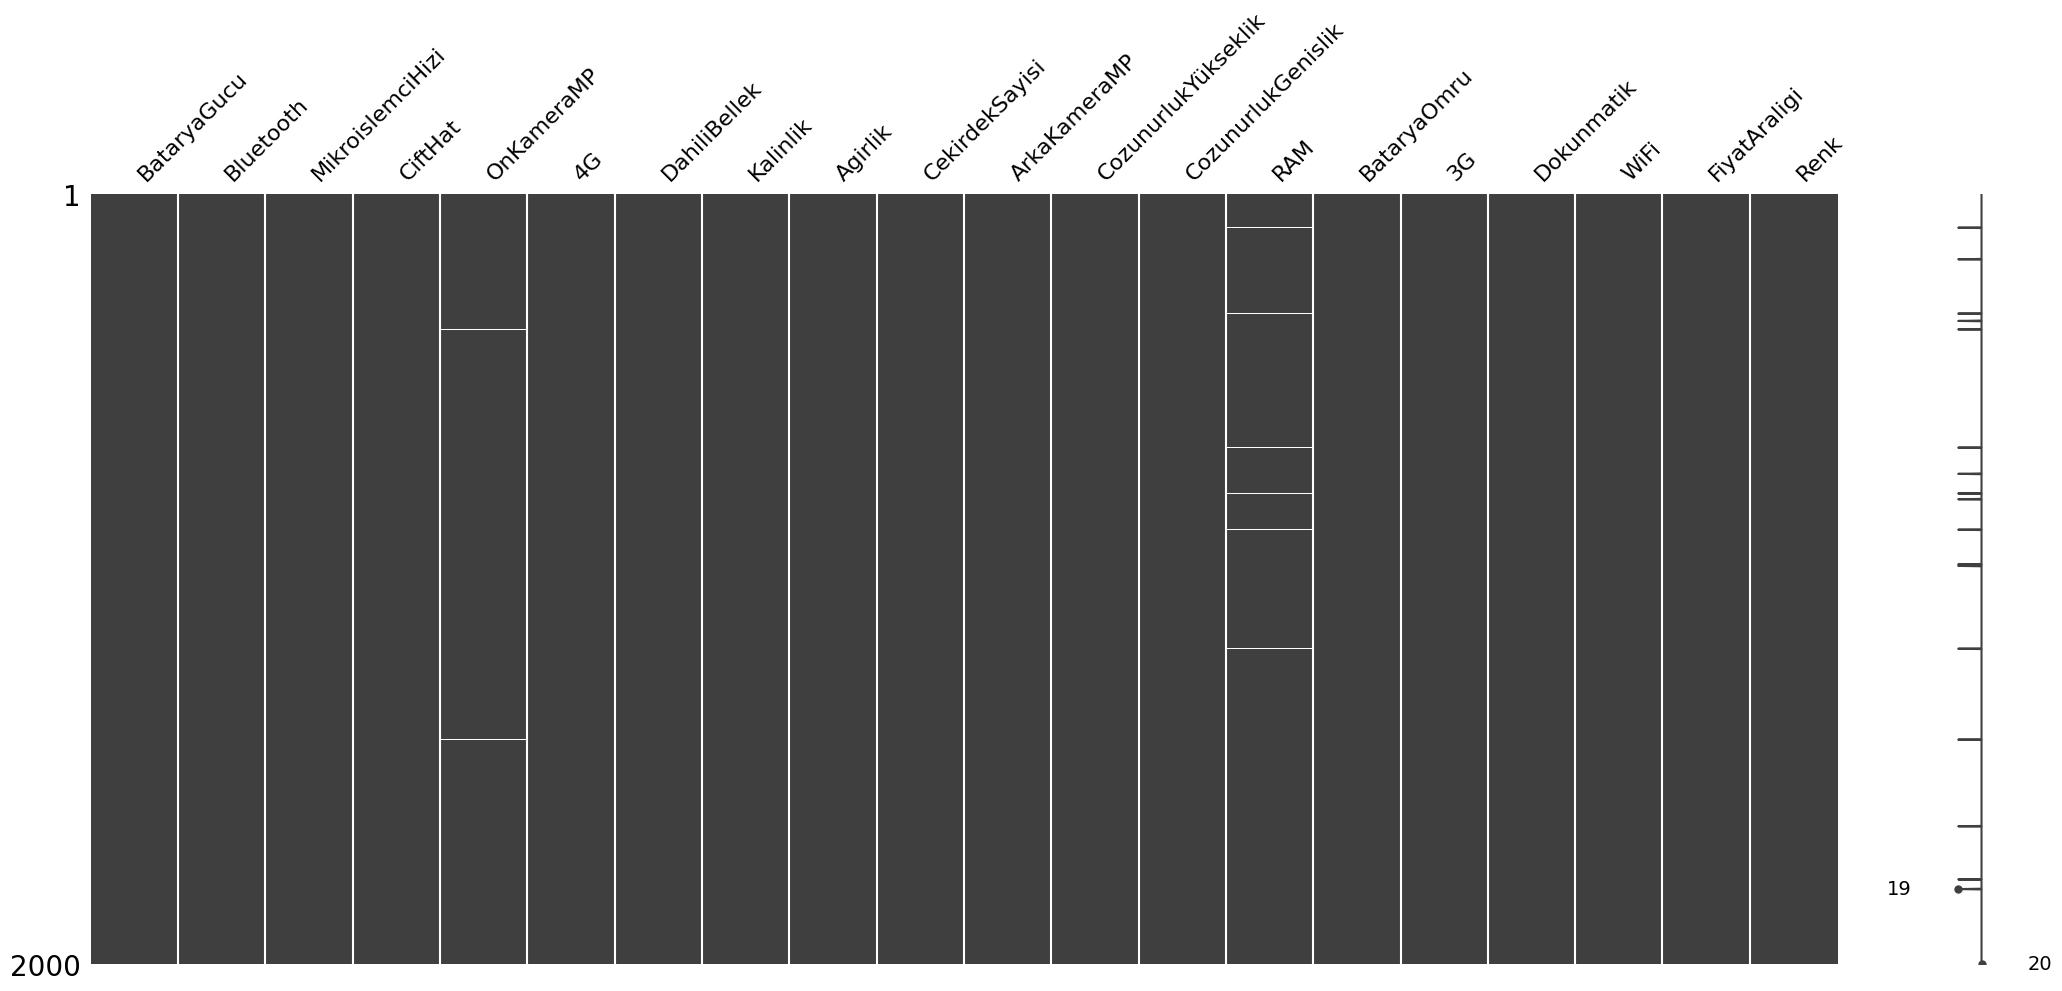

In [51]:
# LET'S VISUALIZE THE MISSING VALUES IN OUR DATA FRAMEWORK.(VERİ ÇERÇEVEMİZDEKİ EKSİK DEĞERLERİ GÖRSELLEŞTİRELİM.)

msg.matrix(df)

In [52]:
# WE WILL FILL THE MISSING VALUES IN OUR DATA FRAMEWORK WITH THE AVERAGE VALUE FOR EACH ATTRIBUTE. FOR THIS
# FIRST LET'S DISPLAY THE AVERAGE VALUES OF "OnKameraMP" AND "RAM" ATTRIBUTES AND THEN
# LET'S FILL THE MISSING VALUE IN OUR DATA SET WITH THE AVERAGE VALUE.
# (VERİ ÇERÇEVEMİZDEKİ EKSİK DEĞERLERİ HER BİR ÖZNİTELİK İÇİN ORTALAMA DEĞERLELE DOLDURACAĞIZ. BUNUN İÇİN
# İLK ÖNCE "OnKameraMP" VE "RAM" ÖZNİTELİKLERİNİN ORTALAMA DEĞERELERİNİ GÖRÜNTÜLEYELİM VE SONRASINDA İSE
# VERİ SETİMİZDEKİ EKSİK DEĞERİ ORTALAMA DEĞER İLE DOLDURELIM.)

In [53]:
# LET'S LOOK AT THE AVERAGE VALUE OF OnKameraMP ATTRIBUTE.(OnKameraMP ÖZNİTELİĞİNİN ORTALAMA DEĞERİNE BAKALIM.)
df["OnKameraMP"].mean()

4.312280701754386

In [54]:
# LET'S LOOK AT THE AVERAGE VALUE OF THE RAM ATTRIBUTE.(RAM ÖZNİTELİĞİNİN ORTALAMA DEĞERİNE BAKALIM.)

df["RAM"].mean()

2116.243963782696

In [55]:
# AFTER FILLING THE BLANKS WITH THE AVERAGE, LET'S DISPLAY 10 RANDOM VARIABLES OF OUR DATA FRAMEWORK.(BOŞLUKLARI ORTALAMAYLA DOLDURDUKTAN SONRA VERİ ÇERÇEVEMİZİN RASTGELE 10 DEĞİŞKENİNİ GÖRÜNTÜLEYELİM.)

df_numeric = df.select_dtypes(include = ["int" , "float"])
df_numeric_filled = df_numeric.fillna(df_numeric.mean())
df_numeric_filled.sample(10)

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
1634,1447,2.5,2.0,9,0.2,155,8,16,737,1455,568.0,8
1739,1189,2.3,13.0,8,0.5,198,3,14,379,932,893.0,13
544,1095,2.6,0.0,44,0.7,103,4,5,838,1066,3209.0,8
731,1136,0.5,0.0,9,0.9,150,6,2,1307,1767,2110.0,16
858,741,1.5,1.0,14,0.3,178,5,13,334,594,1886.0,9
859,1665,0.5,3.0,60,0.2,194,6,18,1572,1684,1601.0,14
41,713,1.4,4.0,53,0.8,98,1,17,123,1477,1462.0,13
1457,1190,2.0,0.0,40,0.2,93,5,1,1399,1646,3610.0,9
1485,995,1.3,1.0,10,0.1,104,4,3,258,1889,609.0,5
884,986,1.5,1.0,23,0.8,183,8,3,471,800,2385.0,19


In [56]:
# LET'S MAKE SURE THAT THE MISSING VALUES IN OUR DATA FRAMEWORK ARE FILLED.(VERİ ÇERÇEVEMİZDEKİ EKSİK DEĞERLERİN DOLDUĞUNDAN EMİN OLALIM.)

df_numeric_filled.isnull().sum()

BataryaGucu            0
MikroislemciHizi       0
OnKameraMP             0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
dtype: int64

In [57]:
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [58]:
# SINCE COLORS HAVE NO SUPERIORITY OVER EACH OTHER, LET'S INFER CATEGORICAL ATTRIBUTES FROM COLOR ATTRIBUTES USING "get_dummies".(RENKLERİN BİRBİRİNE ÜSTÜNLÜKLERİ OLMADIĞI İÇİN "get_dummies" KULLANARAK RENK ÖZNİTELİĞİNE DAİR KATEGORİK ÖZNİTELİK ÇIKARIMINDA BULUNALIM.)

df_renkler = pd.get_dummies(df["Renk"])
df_renkler.head()

,Beyaz,Gri,Kahverengi,Kırmızı,Mavi,Mor,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,False,False


In [59]:
df = pd.concat([df , df_renkler] , axis = 1)
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Kahverengi,Kırmızı,Mavi,Mor,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,...,False,False,False,False,False,False,False,False,False,False
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,...,False,False,False,False,True,False,False,False,False,False
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,...,False,False,False,True,False,False,False,False,False,False
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,...,False,False,False,False,False,False,False,False,True,False
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,...,False,False,False,False,False,False,False,False,False,False


In [60]:
# LET'S DELETE THE COLOR ATTRIBUTE AND ONE OF THE COLORS CREATED AS DUMMY AND UPDATE OUR DATA FRAMEWORK. AS DUMMY
# THE REASON WE EXCLUDE ONE OF THE CREATED COLORS IS BECAUSE THE NUMBER OF CLASSES OF CATEGORICAL VARIABLES IN THE DATA SET IS MORE
# THERE SHOULD BE A SMALL NUMBER OF DUMMY VARIABLES
# (RENK ÖZNİTELİĞİNİ VE DUMMY OLARAK YARATILAN RENKLERDEN BİRİNİ SİLİP VERİ ÇERÇEVEMİZİ GÜNCELLEYELİM. DUMMY OLARAK
# YARATILAN RENKLERDEN BİRİNİ HARİÇ TUTMAMIZIN SEBEBİ VERİ SETİNDE KATEGORİK DEĞİŞKENLERİN SINIF SAYISINDAN DAHA
# AZ SAYIDA DUMMY DEĞİŞKEN OLMASI GEREKTİĞİDİR.)

df.drop(["Mor" , "Renk"] , axis = 1 , inplace = True)
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,...,False,False,False,False,False,False,False,False,False,False
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,...,False,False,False,False,True,False,False,False,False,False
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,...,False,False,False,False,False,False,False,False,False,False
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,...,False,False,False,False,False,False,False,False,True,False
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,...,False,False,False,False,False,False,False,False,False,False


In [61]:
# LET'S EXAMINE THE ORDINAL VALUES IN THE DATA FRAMEWORK.(VERİ ÇERÇEVESİNDEKİ ORDİNAL DEĞERLERİ İNCELEYELİM.)

kategori = pd.Categorical(df["ArkaKameraMP"] , ordered = True)
print(kategori)

[10, 0, 4, 14, 18, ..., 6, 2, 14, 6, 10]
Length: 2000
Categories (21, int64): [0 < 1 < 2 < 3 ... 17 < 18 < 19 < 20]


In [62]:
kategori = pd.Categorical(df["DahiliBellek"] , ordered = True)
kategori

[50, 58, 16, 50, 18, ..., 7, 11, 56, 53, 26]
Length: 2000
Categories (63, int64): [2 < 3 < 4 < 5 ... 61 < 62 < 63 < 64]

In [63]:
#WE SAID THAT THERE ARE 4 UNIQUE VALUES BELONGING TO THE # PriceRange ATTRIBUTE (NORMAL, EXPENSIVE, CHEAP, VERY CHEAP)
# NOW LET'S DIGITAL THESE VALUES IN THIS SECTION. (NORMAL, EXPENSIVE, CHEAP, VERY CHEAP) VALUES (0,1,2,3) NUMERIC
#LET'S CHANGE IT WITH # VALUES
# (FiyatAraligi ÖZNİTELİĞİNE AİT 4 ADET BENZERSİZ DEĞER OLDUĞUNU SÖYLEMİŞTİK(NORMAL , PAHALI , UCUZ , ÇOK UCUZ)
# ŞİMDİ BU BÖLÜMDE BU DEĞERLERİ SAYISALLAŞTIRALIM. (NORMAL , PAHALI , UCUZ , ÇOK UCUZ) DEĞERLERİNİ (0,1,2,3) SAYISAL
# DEĞERLERİ İLE DEĞİŞTERELİM.)

df["FiyatAraligi"] = df["FiyatAraligi"].replace("Çok Ucuz" , 0)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Ucuz" , 1)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Normal" , 2)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Pahalı" , 3)

In [64]:
# SINCE THE ATTRIBUTES WITH TYPE OBJECT IN OUR DATA FRAME HAVE TWO VALUES: "EXISTS" AND "NOT", THESE VALUES
# DIGITALIZE (EXIST = 1, NOT = 0)
# (VERİ ÇERÇEVEMİZDEKİ TİPİ OBJECT OLAN ÖZNİTELİKLERİN "VAR" VE "YOK" OLMAK ÜZERE İKİ DEĞERİ OLDUĞUNDAN BU DEĞERLERİ
# SAYISALLAŞTIRALIM (VAR = 1 , YOK = 0))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [65]:
df.replace("Var" , 1 , inplace = True)
df.replace("Yok" , 0 , inplace = True)

In [66]:
# LET'S DISPLAY THE VARIABLES WE MADE.(YAPTIĞIMIZ DEĞİŞKENLERİ GÖRÜNTÜLEYELİM.)

df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,False,False,False,False,False,False,False,False,False,False
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,False,False,False,False,True,False,False,False,False,False
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,False,False,False,False,False,False,False,False,False,False
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,False,False,False,False,False,False,False,False,True,False
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,False,False,False,False,False,False,False,False,False,False


In [67]:
# PHASE 3 ---> MACHINE LEARNING(3.SAFHA ---> MAKİNE ÖĞRENMESİ)

In [68]:
# MAKE THE PRICERANGE ATTRIBUTE A DEPENDENT VARIABLE, AND THE REMAINING OTHER ATTRIBUTES ARE ALSO INDEPENDENT VARIABLES
# LET'S DIVIDE THIS DATA SET IN TWO AS "x" and "y" (y = DEPENDENT VARIABLE, x = INDEPENDENT VARIABLE)
# (FiyatAraligi ÖZNİTELİĞİNİ BAĞIMLI DEĞİŞKEN , GERİYE KALAN DİĞER ÖZNİTELİKLERİ DE BAĞIMSIZ DEĞİŞKEN OLMAK ÜZERE
# BU VERİ SETİNİ "x" ve "y" ŞEKLİNDE İKİYE AYIRALIM (y = BAĞIMLI DEĞİŞKEN , x = BAĞIMSIZ DEĞİŞKEN))

y = df["FiyatAraligi"]
x = df.drop("FiyatAraligi" , axis = 1)

In [69]:
# IT IS OBSERVED THAT OUR INDEPENDENT VARIABLE CONSISTS OF 2000 OBSERVATIONS AND 29 ATTRIBUTES(BAĞIMSIZ DEĞİŞKENİMİZİN 2000 GÖZLEM VE 29 NİTELİKTEN OLUŞTUĞU GÖRÜLMEKTEDİR)

x

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,False,False,False,False,False,False,False,False,False,False
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,False,False,False,False,True,False,False,False,False,False
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,False,False,False,False,False,False,False,False,False,False
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,False,False,False,False,False,False,False,False,True,False
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,0,2.9,1,3.0,1,7,0.8,147,2,...,False,False,False,False,False,False,True,False,False,False
1996,1654,0,1.8,0,1.0,0,11,0.3,146,7,...,False,False,False,False,False,True,False,False,False,False
1997,742,0,2.2,1,4.0,0,56,0.2,190,7,...,False,False,False,False,False,False,False,False,True,False
1998,704,0,2.2,1,4.0,0,53,0.2,186,6,...,False,False,False,False,False,False,False,True,False,False


In [70]:
y

0       2
1       3
2       1
3       3
4       2
       ..
1995    0
1996    1
1997    3
1998    2
1999    2
Name: FiyatAraligi, Length: 2000, dtype: int64

In [71]:
# # LET'S CREATE 4 PARTS FROM THESE VARIABLES TO BE TRAINED AND TESTED. DATA IN THE DATA SET. 75% FOR EDUCATION
# LET'S RESERVE THE REMAINING 25% FOR TESTING.(BU DEĞİŞKENLERDEN TRAİN VE TEST OLMAK ÜZERE 4 PARÇA OLUŞTURALIM. VERİ SETİNDEKİ VERİLERİ. %75'İNİ EĞİTİM İÇİN
# KALAN %25'İNİ DE TEST İÇİN AYIRALIM.)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state = 42)

In [72]:
y_train

1738    0
548     1
936     1
1389    2
1607    2
       ..
1130    0
1294    3
860     2
1459    2
1126    1
Name: FiyatAraligi, Length: 1500, dtype: int64

In [73]:
y_test

1860    1
353     0
1333    2
905     1
1289    2
       ..
765     0
1356    0
408     0
1614    3
694     2
Name: FiyatAraligi, Length: 500, dtype: int64

In [74]:
x_train

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
1738,867,0,1.4,1,0.0,1,4,0.7,135,6,...,False,False,False,False,False,False,True,False,False,False
548,1404,0,2.1,0,16.0,0,44,0.9,151,1,...,False,True,False,False,False,False,False,False,False,False
936,683,1,2.1,0,7.0,0,30,0.1,197,7,...,False,False,False,False,False,False,True,False,False,False
1389,1109,1,2.8,1,6.0,0,57,0.9,151,1,...,False,False,False,False,False,False,False,False,True,False
1607,1395,0,1.8,1,0.0,0,23,0.1,111,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,605,0,1.0,0,8.0,1,9,0.1,142,3,...,False,False,True,False,False,False,False,False,False,False
1294,1149,1,2.2,0,4.0,0,30,0.2,106,6,...,False,True,False,False,False,False,False,False,False,False
860,534,0,0.5,1,4.0,0,2,0.2,85,5,...,True,False,False,False,False,False,False,False,False,False
1459,1720,0,1.6,0,18.0,1,2,0.8,188,5,...,False,False,False,False,False,False,False,True,False,False


In [75]:
x_test

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
1860,1433,1,2.3,0,2.0,1,5,0.1,129,5,...,False,False,False,False,False,False,False,False,False,False
353,1174,1,0.9,0,7.0,0,30,1.0,147,4,...,False,False,False,False,False,False,True,False,False,False
1333,999,0,2.6,1,11.0,1,56,1.0,165,4,...,False,False,False,False,True,False,False,False,False,False
905,972,1,0.5,1,5.0,0,13,0.4,193,5,...,False,False,False,False,False,False,False,True,False,False
1289,1811,1,2.5,0,4.0,1,5,0.6,98,4,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1530,0,2.0,0,11.0,0,42,0.8,177,6,...,False,False,False,False,False,False,False,False,False,False
1356,668,0,2.3,0,2.0,1,48,0.3,114,1,...,False,False,False,False,False,False,False,True,False,False
408,1179,1,0.8,0,1.0,0,5,0.9,154,5,...,False,False,True,False,False,False,False,False,False,False
1614,1456,0,1.6,1,9.0,1,39,0.1,80,8,...,False,False,True,False,False,False,False,False,False,False


In [76]:
#LET'S CREATE OUR GAUSSIANNB MODEL. TRAINING DATA CREATED FROM DEPENDENT-INDEPENDENT VARIABLES TO TRAIN THE MODEL
# LET'S GIVE. AFTER, LET'S HAVE THE MODEL PREDICT THE DEPENDENT TEST VARIABLE (y_test) THAT IT DOES NOT SEE LESS. THIS PREDICTION VALUES
# LET'S ASSIGN IT TO THE y_pred VARIABLE.
# (GAUSSİANNB MODELİMİZİ OLUŞTURALIM. MODELİ EĞİTMEK İÇİN BAĞIMLI-BAĞIMSIZ DEĞİŞKENLERDEN OLUŞTURULAN EĞİTİM VERİLİERİNİ
# VERELİM. SONRASINDA İSE MODELE DAHA AZ GÖRMEDİĞİ BAĞIMLI TEST DEĞİŞKENİNİ(y_test) TAHMİN ETTİRELİM.BU TAHMİN DEĞERLERİMİZİ
# y_pred DEĞİŞKENİNE ATAYALIM.)


imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)  # Eğitim setiyle aynı imputer'ı kullanmalısınız

nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)

In [77]:
# LET'S ASK THEM TO PREDICT y_test BY GIVING THEM x_test.(x_test'i VEREREK y_test'i TAHMİN ETMESİNİ İSTEYELİM.)

y_pred = nb_model.predict(x_test)

In [78]:
# LET'S DISPLAY THE ACCURACY SCORE(DOĞRULUK SKORUNU GÖRÜNTÜLEYELİM)

accuracy_score(y_test , y_pred)

0.752

In [79]:
# LET'S DISPLAY ALL THE COMMANDS THAT CAN BE WRITTEN ON THE MODEL.(MODEL ÜZERİNDE YAZILABİLECEK TÜM KOMUTLARI GÖRÜNTÜLEYELİM.)

dir(nb_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_parameter_constraints',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 '_validate_params',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_joint_log_proba',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'sc

In [80]:
# LET'S CREATE THE COMPLEXITY MATRIX.(KARMAŞIKLIK MATRİSİNİ OLUŞTURALIM.)

karmasiklik_matrisi = confusion_matrix(y_test , y_pred)
karmasiklik_matrisi

array([[119,  10,   0,   0],
       [  8,  93,  26,   0],
       [  0,  30,  78,  23],
       [  0,   1,  26,  86]])

In [81]:
# LET'S CALCULATE THE SCORE AGAIN BY COMBINING THE MODEL WITH DIFFERENT OBSERVATIONS.(MODELİ FARKLI GÖZLEMLERLE KOMBİNLEYEREK TEKRARDAN SKORUNU HESAPLAYALIM.)



# Gaussian Naive Bayes modelini oluşturma
nb = GaussianNB()

# Çapraz doğrulama skorlarını hesaplama
scores = cross_val_score(nb, x_train, y_train, cv=10)

print("Cross-validation scores:", scores)

Cross-validation scores: [0.68666667 0.74       0.69333333 0.78666667 0.71333333 0.65333333
 0.76       0.68666667 0.74       0.70666667]


In [82]:
# LET'S DISPLAY THE AVERAGE OF THE SCORE FOR 10 DIFFERENT VALUES.(10 FARKLI DEĞER İÇİN SKORUN ORTALAMASINI GÖRÜNTÜLEYELİM.)

cross_val_score(nb_model , x_train , y_train , cv = 10).mean()

0.7166666666666668

In [83]:
# LET'S DRAW A CLASSIFICATION REPORT.(SINIFLANDIRMA RAPORU ÇİZDRİRELİM.)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       129
           1       0.69      0.73      0.71       127
           2       0.60      0.60      0.60       131
           3       0.79      0.76      0.77       113

    accuracy                           0.75       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



In [84]:
# LET'S DISPLAY THE CATCHING SCORE.(YAKALAMA SKORUNU GÖRÜNTÜLEYELİM.)

YakalamaSkoru = recall_score(y_test, y_pred, average="weighted")
print(YakalamaSkoru)

0.752


In [85]:
# LET'S DISPLAY THE F1 SCORE.(F1 SKORUNU GÖRÜNTÜLEYELİM.)

F1Skoru = f1_score(y_test , y_pred , average = "weighted")
F1Skoru

0.7525676695013979

In [86]:
# LET'S DISPLAY THE PRECISION SCORE.(KESİNLİK SKORUNU GÖRÜNTÜLEYELİM.)

PrecisionSkoru = precision_score(y_test , y_pred , average = "weighted")
PrecisionSkoru

0.7535435401911198

In [88]:
# LET'S BUILD AND DISPLAY OUR MODEL.(MODELİMİZİ İNŞAA EDELİM VE GÖRÜNTÜLEYELİM.)

new = DecisionTreeClassifier(random_state = 42 , criterion = "entropy")
new_model = new.fit(x_train , y_train)
new_model

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [89]:
# LET'S MAKE PREDICTIONS FOR THIS MODEL WE FOUNDED WITHOUT OPTIMIZING THE PARAMETERS.(PARAMETRELERİ OPTİMİZE ETMEDEN KURDUĞUMUZ BU MODEL İÇİN TAHMİNLERDE BULUNALIM.)

y_pred = new_model.predict(x_test)

In [90]:
# LET'S DISPLAY THE ACCURACY SCORE ACCORDING TO THE PREDICTIONS MADE FOR THE "x_test" DATA THAT IT HAS NEVER SEEN YET.(DAHA HİÇ GÖRMEDİĞİ "x_test" VERİLERİ İÇİN BULUNDUĞU TAHMİNLERE GÖRE DOĞRULUK SKORUNU GÖRÜNTÜLEYELİM.)

accuracy_score(y_test , y_pred)

0.838

In [91]:
# LET'S DISPLAY THE F1 SCORE.(F1 SKORUNU GÖRÜNTÜLEYELİM.)

F1Skoru = f1_score(y_test , y_pred , average = "weighted")
F1Skoru

0.8392032623231622

In [92]:
# LET'S PRAW THE COMPLEXITY MATRIX.(KARMAŞIKLIK MATRİSİNİ ÇİZDİRELİM.)

Karmasiklik_matrisi = confusion_matrix(y_test , y_pred)
Karmasiklik_matrisi

array([[112,  17,   0,   0],
       [  8, 108,  11,   0],
       [  0,  14, 105,  12],
       [  0,   0,  19,  94]])